<a href="https://colab.research.google.com/github/mrreyesm/FINANCIAL_ASSET_ANALYSIS/blob/main/FINANCIAL_ASSET_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##FINANCIAL ASSET ANALYSIS - VISA

# Libraries

In [37]:
#Importing Librarys 
# For system related operations
import sys
# For saving access tokens and for file mngmnt when creating and adding to the dataset
import os
# For Data Processing
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# Data Visualization
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data
import pandas_datareader as pdr
# For time stamps
from datetime import datetime, timedelta
from dateutil.tz import gettz
import time
# For sending GET requests from the API
import requests
# For dealing with json responses we receive from the API
import json
# For saving the response data in CSV format
import csv
# For parsing the dates received from twitter in readable formats
import dateutil.parser
import unicodedata
#To add wait time between requests
import time
# For natural language processing
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words_n = nltk.corpus.stopwords.words('english')
from nltk import word_tokenize
# For string manipulation
import string
# To create a word cloud with tweets
from wordcloud import WordCloud
# For yahoo finance
!{sys.executable} -m pip install yfinance
import yfinance as yf
# For long strings
import textwrap
# For linear regression
from scipy import stats
# For calculating technical indicators
!{sys.executable} -m pip install -U git+https://github.com/twopirllc/pandas-ta
!{sys.executable} -m pip install TA-Lib
import pandas_ta as ta
#Global variables
# API key
os.environ['TOKEN'] = 'AAAAAAAAAAAAAAAAAAAAAKwsZwEAAAAARfPLFsHkhgzkATLhA4UJzvVEugQ%3DL3goAkl3kgtVBWw619JvpHPVGFJsOwetuedpvlozXPaaelGFTt'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twopirllc/pandas-ta to /tmp/pip-req-build-bcg7dwcd
  Running command git clone -q https://github.com/twopirllc/pandas-ta /tmp/pip-req-build-bcg7dwcd
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached TA-Lib-0.4.24.tar.gz (269 kB)
  ERROR: Failed building wheel for TA-Lib
  Running setup.py clean for TA-Lib
Failed to build TA-Lib
    Running setup.py install for TA-Lib ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptoo

# Extract & Transform (Yahoo Finance API)

In [ ]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2008-03-19,13.483554,15.63639,12.463789,12.803711,708486000,0.0,0.0
2008-03-20,13.234276,14.72993,13.030323,14.582630,198985200,0.0,0.0


Text(0.5, 0, 'Date')

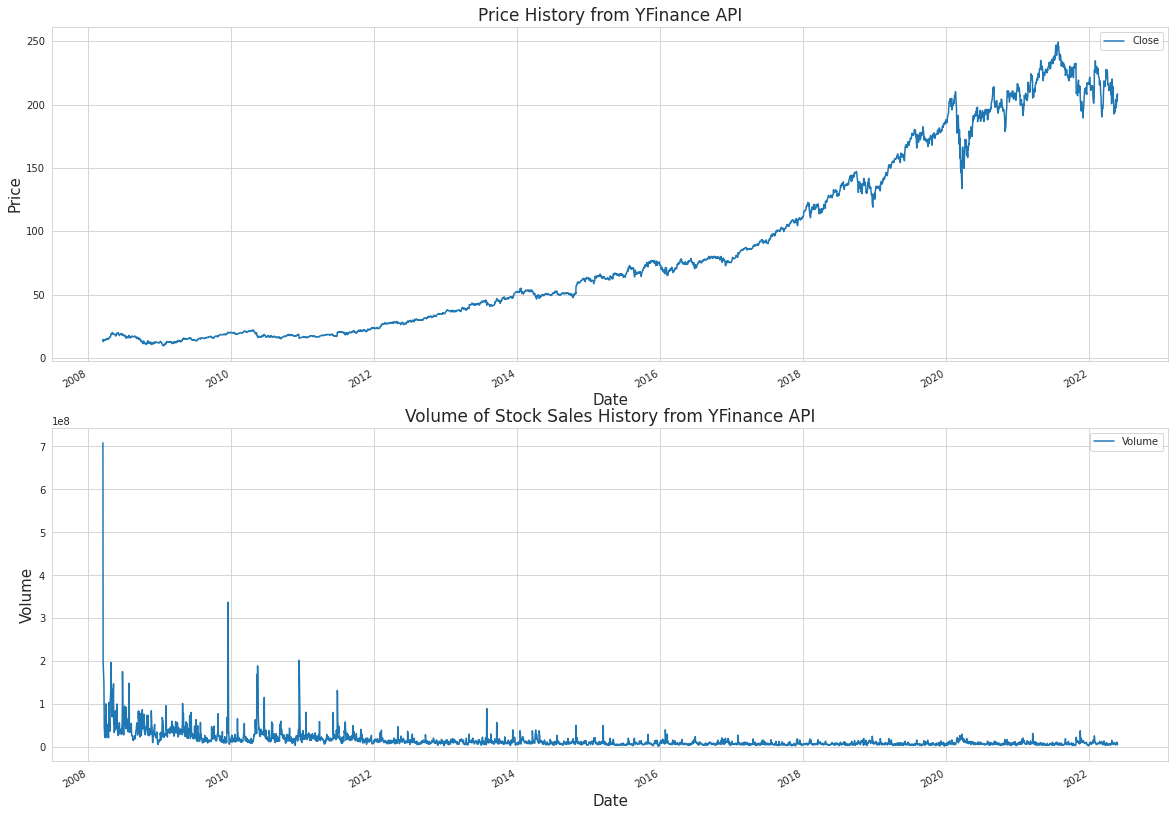

In [ ]:
# Let's see a historical view of the closing price
plt.rcParams['figure.figsize'] = (20,15)
plt.subplot(2, 1, 1)
hist['Close'].plot(legend=True)
plt.title('Price History from YFinance API',fontsize=17)
plt.ylabel('Price', fontsize=15)
plt.xlabel('Date', fontsize=15)
# Now let's plot the total volume of stock being traded each day
plt.subplot(2, 1, 2)
hist['Volume'].plot(legend=True)
plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
plt.ylabel('Volume', fontsize=15)
plt.xlabel('Date', fontsize=15)

In [ ]:
#Basic info
longName = symbol.info["longName"]
shortName = symbol.info["shortName"]
symb = symbol.info["symbol"]
market = symbol.info["market"]
sector = symbol.info["sector"]
industry= symbol.info["industry"]
longBusinessSummary = symbol.info["longBusinessSummary"]
currentPrice = symbol.info["currentPrice"]
currency = symbol.info["currency"]
#Useful information for calculations
recommendationKey = symbol.info["recommendationKey"]
regularMarketDayHigh = symbol.info["regularMarketDayHigh"]
regularMarketDayLow = symbol.info["regularMarketDayLow"]
regularMarketPreviousClose = symbol.info["regularMarketPreviousClose"]
regularMarketOpen = symbol.info["regularMarketOpen"]
regularMarketPrice = symbol.info["regularMarketPrice"]
regularMarketVolume = symbol.info["regularMarketVolume"]
totalDebt= symbol.info["totalDebt"]
totalRevenue= symbol.info["totalRevenue"]
totalDebt= symbol.info["totalDebt"]
ebitda= symbol.info["ebitda"]
marketCap = symbol.info["marketCap"]
regularMarketPrice = symbol.info["regularMarketPrice"]
freeCashflow = symbol.info["freeCashflow"]
open = symbol.info["open"]
currentPrice = symbol.info["currentPrice"]
dayHigh = symbol.info["dayHigh"]
dayLow = symbol.info["dayLow"]
targetHighPrice = symbol.info["targetHighPrice"]
targetLowPrice = symbol.info["targetLowPrice"]
targetMeanPrice= symbol.info["targetMeanPrice"]
targetMedianPrice = symbol.info["targetMedianPrice"]
#symbol.info

In [ ]:
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\nCurrent price: {currentPrice} Currency: {currency}")

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 208.55 Currency: USD


# CAPM Capital Asset Pricing Model

The basic idea is this: if you take on more risk, you expect a higher return.
Otherwise, there's no point in taking the risk.
I wouldn't invest in something that's riskier if it brings me less returns

The question now is: what level of return is appropriate at which risk level? 
And this is what the Capital Asset Pricing Model tries to answer. 
It tells you: at this risk level, this would be an appropriate return.

CAPM Financial Reporting
https://empmd.htw-berlin.de/mod/hvp/view.php?id=1723

German bonds
https://www.bundesbank.de/

In [ ]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
hist['Returns'] = hist['Close'].pct_change()
hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
2008-03-19,13.483552,15.636388,12.463788,12.803709,708486000,0.0,0.0,NaN
2008-03-20,13.234277,14.729931,13.030323,14.582631,198985200,0.0,0.0,0.138938
2008-03-24,15.237546,15.341789,13.370245,13.535673,149566400,0.0,0.0,-0.071795
2008-03-25,13.728294,14.559968,13.556067,14.333354,87092000,0.0,0.0,0.058932
2008-03-26,14.215518,14.612094,13.952645,14.494253,43111600,0.0,0.0,0.011226


In [ ]:
benchmark = yf.Ticker("SPY")
#Basic info
longName = benchmark.info["longName"]
shortName = benchmark.info["shortName"]
symb = benchmark.info["symbol"]
market = benchmark.info["market"]
sectorWeightings = benchmark.info["sectorWeightings"]
longBusinessSummary = benchmark.info["longBusinessSummary"]
preMarketPrice = benchmark.info["preMarketPrice"]
currency = benchmark.info["currency"]
#Print info
print(f"Name: {longName} Symbol: {symb} Market: {market}")
print(f"Sector Weightings: {sectorWeightings}")
wrapper = textwrap.TextWrapper(width=80)
word_list = wrapper.wrap(text=longBusinessSummary)  
for element in word_list:
    print(element)
print(f"\npre Market Price: {preMarketPrice} Currency: {currency}")
# get historical market data
benchmark_hist = benchmark.history(period="max")
benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
benchmark_hist.sort_values(by = "Date", ascending=False).head()

Name: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
Sector Weightings: [{'realestate': 0.0292}, {'consumer_cyclical': 0.1121}, {'basic_materials': 0.024400001}, {'consumer_defensive': 0.0733}, {'technology': 0.2468}, {'communication_services': 0.0864}, {'financial_services': 0.13149999}, {'utilities': 0.024500001}, {'industrials': 0.08270001}, {'energy': 0.0417}, {'healthcare': 0.1428}]
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

pre Market Price: 406.4 Currency: USD


,Open,High,Low,bnchmrk_Close,Volume,Dividends,Stock Splits,bnchmrk_Returns
Date,,,,,,,,
2022-05-26,398.670013,407.040009,398.450012,405.309998,81974900,0.0,0,0.019981
2022-05-25,392.309998,399.450012,391.890015,397.369995,91472900,0.0,0,0.008835
2022-05-24,392.559998,395.149994,386.959991,393.890015,91448800,0.0,0,-0.007634
2022-05-23,392.829987,397.730011,390.380005,396.920013,76414900,0.0,0,0.018710
2022-05-20,393.250000,397.029999,380.540009,389.630005,131209600,0.0,0,0.000437


In [ ]:
capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
capm = capm.last('13M')
print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
mean_return_stock = capm['Returns'].mean()
stddev_return_stock = capm['Returns'].std()
print(
    "\nDAILY MEAN RETURN: ", mean_return_stock,
    "\nYEARLY MEAN RETURN: ", ((1+mean_return_stock)**250)-1,
    "\nSTD DEV: ", stddev_return_stock)
mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
print(
    "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
    "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1,
    "\nSTD DEV: ", stddev_return_benchmark_hist)
yearly_stock_returns = ((1+mean_return_stock)**250)-1
yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
capm.head()

START DATE:  2021-05-03 00:00:00 END DATE:  2022-05-26 00:00:00

DAILY MEAN RETURN:  -0.00022224039803317677 
YEARLY MEAN RETURN:  -0.054050670510669474 
STD DEV:  0.018284415667272312

DAILY RM or MARKET RETURN:  2.871060451468785e-06 
YEARKY RM or MARKET RETURN:  0.0007180217367541708 
STD DEV:  0.011153991746722042


,Close,Returns,bnchmrk_Close,bnchmrk_Returns
Date,,,,
2021-05-03,230.732010,-0.004067,412.768158,0.002157
2021-05-04,230.156693,-0.002493,410.221680,-0.006169
2021-05-05,227.359451,-0.012154,410.349976,0.000313
2021-05-06,229.452423,0.009206,413.626892,0.007986
2021-05-07,230.245956,0.003458,416.637238,0.007278


Slope:  1.0884753826409492 
Intercept:  -0.00022536547665667455 
R value:  0.6639996407551831 
P Value:  7.948546738217775e-36 
STD Err:  0.07473449631736533


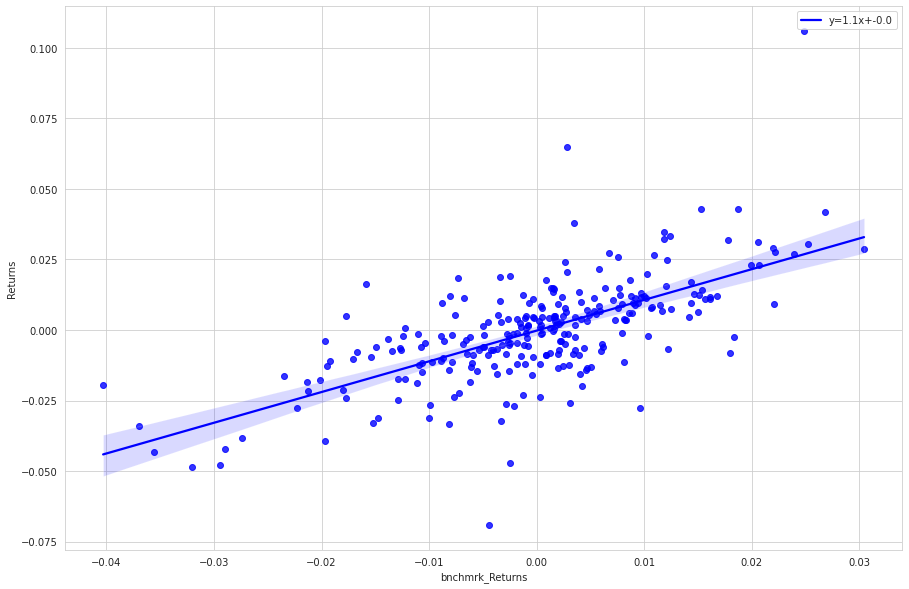

In [ ]:
# get coeffs of linear fit
capm.dropna(inplace=True)
slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
print("Slope: ", slope, "\nIntercept: ", intercept,
      "\nR value: ", r_value, "\nP Value: ", p_value,
      "\nSTD Err: ", std_err)
# use line_kws to set line label for legend
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# plot legend
ax.legend()
plt.show()

expected_return = RFR + Beta*((mean_return_benchmark_hist or RM) -RFR)

In [ ]:
RFR = 0.95 #risk free rate - 9 to 10 years german bonds
beta = slope
shortName = symbol.info["shortName"]

if beta < 1:
  print(f"Beta < 1: less risky than market. Beta: {beta}")
else:
  print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

expected_return = RFR + beta*(yearly_market_returns - RFR)
print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

if expected_return > yearly_stock_returns:
  print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
\nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
else:
  print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
\nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")

Beta >= 1: as risky or more risky than the market. Beta: 1.0884753826409492

Expected return or CAPM return of the stock:  -8.327 %

The CAPM returns are less than the yearly returns of the stock, Visa Inc. is undervalued.

CAPM Returns: -8.327% < Yearly returns of Visa Inc.: -5.405%


# Technical Indicators

## Relative Strength Index (RSI) 

In [22]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, output: str = None, price: str = 'Close'):
    """
    An implementation of Wells Wilder's RSI calculation as outlined in
    his 1978 book "New Concepts in Technical Trading Systems" which makes
    use of the α-1 Wilder Smoothing Method of calculating the average
    gains and losses across trading periods and the Pandas library.
    @author: https://github.com/alphazwest
    Args:
        df: pandas.DataFrame - a Pandas Dataframe object
        window_length: int - the period over which the RSI is calculated. Default is 14
        output: str or None - optional output path to save data as CSV
        price: str - the column name from which the RSI values are calcuated. Default is 'Close'
    Returns:
        DataFrame object with columns as such, where xxx denotes an inconsequential
        name of the provided first column:
            ['xxx', 'diff', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi']
    """
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['Close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages'
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))

    # Save if specified
    if output is not None:
        df.to_csv(output)

    return df

In [24]:
stock = "V"
symbol = yf.Ticker(stock)
# get historical market data
hist = symbol.history(period="max")
# Make RSI Calculations
pandas_rsi(df=hist, window_length=14, price='Close')
print(hist)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


                  Open        High         Low       Close     Volume  \
Date                                                                    
2008-03-19   13.483551   15.636387   12.463787   12.803708  708486000   
2008-03-20   13.234271   14.729925   13.030318   14.582625  198985200   
2008-03-24   15.237542   15.341784   13.370241   13.535669  149566400   
2008-03-25   13.728295   14.559969   13.556068   14.333355   87092000   
2008-03-26   14.215515   14.612091   13.952642   14.494250   43111600   
...                ...         ...         ...         ...        ...   
2022-05-23  200.880005  207.960007  200.770004  207.559998   12187400   
2022-05-24  203.910004  204.669998  199.029999  202.630005    7458500   
2022-05-25  200.589996  204.949997  200.470001  203.839996    5457200   
2022-05-26  205.110001  209.740005  204.669998  208.550003    9207500   
2022-05-27  210.000000  211.899994  209.639999  211.460007    1653676   

            Dividends  Stock Splits      diff  gai

In [36]:
# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
# Create Candlestick chart for price data
fig.add_trace(go.Candlestick(
    x=hist.index,
    open=hist['Open'],
    high=hist['High'],
    low=hist['Low'],
    close=hist['Close'],
    increasing_line_color='#ff9900',
    decreasing_line_color='black',
    showlegend=False
), row=1, col=1)
# Make RSI Plot
fig.add_trace(go.Scatter(
    x=hist.index,
    y=hist['rsi'],
    line=dict(color='#ff9900', width=2),
    showlegend=False,
), row=2, col=1
)
# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1)
fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
# Customize font, colors, hide range slider
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# update and display
fig.update_layout(layout)
fig.show()

# Sentiment Analysis

### Yahoo Finance News

In [ ]:
# Create dataframe with news info
stock = "V"
symbol = yf.Ticker(stock)
col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
news_df = pd.DataFrame(columns=col_names)
counter = 0
for news in symbol.news:
  link = news["link"]
  providerPublishTime = news["providerPublishTime"]
  title = news["title"]
  ntype = news["type"]
  uuid = news["uuid"]
# Assemble all data in a list
  res = [link, providerPublishTime, title, ntype, uuid]  
  # Append the result to the CSV file
  counter += 1
  df_length = len(news_df)
  news_df.loc[df_length] = res
# Print the number of tweets for this iteration
print("# of news added: ", counter)
news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
news_df.head()

# of news added:  8


,link,providerPublishTime,title,type,uuid
0,https://finance.yahoo.com/news/hong-kong-appli...,2022-05-27 02:32:30,Hong Kong Applications for BNO Visa Jumped Dur...,STORY,2e600096-2d66-339b-ae54-42b4415a6ae6
1,https://finance.yahoo.com/news/why-visa-v-down...,2022-05-26 16:56:04,Why Is Visa (V) Down 4.8% Since Last Earnings ...,STORY,01c46cee-c48f-3423-91d1-36af70e01203
2,https://finance.yahoo.com/news/visas-v-program...,2022-05-26 14:25:02,Visa's (V) New Program to Boost Digitization o...,STORY,c526595a-18f9-307a-9e95-ecc885ff46ee
3,https://finance.yahoo.com/news/mastercard-ma-p...,2022-05-26 13:58:01,Mastercard (MA) Platform to Extend Improved Cy...,STORY,3bfdf697-aec9-3be4-b079-0e3d1b5c2751
4,https://finance.yahoo.com/news/know-beyond-why...,2022-05-26 13:00:01,Here is What to Know Beyond Why Visa Inc. (V) ...,STORY,96278755-03be-381b-9b90-1c4824b07afd


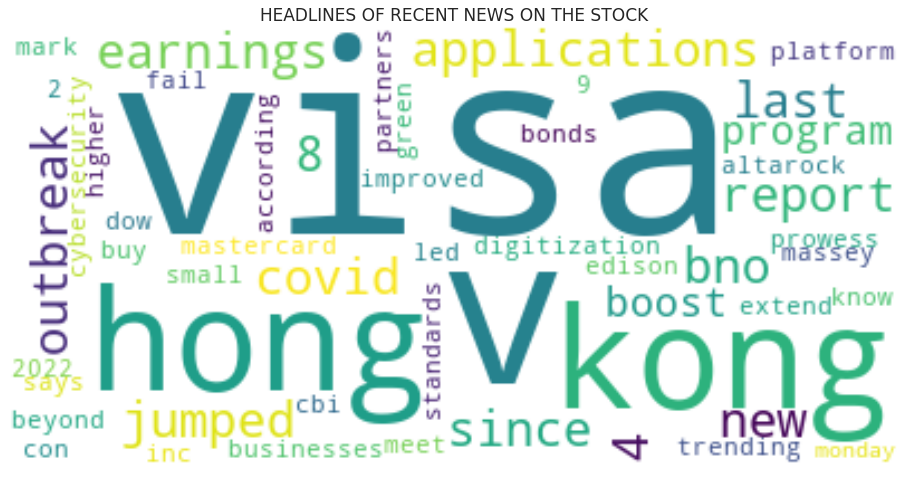

In [ ]:
#Pass to list
data = news_df['title'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["stock", "stocks"]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
plt.show()

### Tweets

In [ ]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):   
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:       
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
    # Print the number of tweets for this iteration 

In [ ]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = f"{shortName} lang:en"
start_time = datetime.now() - timedelta(days=6)
start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
end_time = datetime.now()- timedelta(days=1)
end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
max_results = 100
#Checks response of the request
url = create_url(keyword, start_time, end_time, max_results)
json_response = connect_to_endpoint(url[0], headers, url[1])

Endpoint Response Code: 200


In [ ]:
tweets = append_to_csv(json_response)
tweets.head()

# of Tweets added from this response:  55


,author id,created_at,geo,id,lang,like_count,quote_count,reply_count,retweet_count,source,tweet
0,1186877863305203712,2022-05-26 10:11:38+00:00,,1529767207105855495,en,0,0,0,0,Blog2Social APP,Senior Software Engineer - 482 Visa Sponsorshi...
1,1349246995324551168,2022-05-26 09:26:40+00:00,,1529755891557597184,en,1,0,0,0,Twitter Web App,@boneteacher Confiar Global INC*\nExplore STUD...
2,1979190776,2022-05-26 05:59:03+00:00,,1529703640654655489,en,0,0,0,0,Zapier.com,Visa Inc. $V Expected to Earn Q2 2023 Earnings...
3,732361939490312192,2022-05-26 05:25:23+00:00,,1529695168370249728,en,0,0,0,0,Zapier.com,Visa Inc. $V Expected to Earn Q2 2023 Earnings...
4,61661638,2022-05-26 05:25:22+00:00,,1529695165077762048,en,0,0,0,0,Zapier.com,Visa Inc. $V Expected to Earn Q2 2023 Earnings...


[('inc', 62), ('co', 40), ('https', 37), ('v', 20), ('developer', 17), ('countries', 14), ('remote', 14), ('technology', 10), ('java', 10), ('backend', 10), ('global', 9), ('konnectingtree', 8), ('hiring', 8), ('amp', 7), ('schengen', 7)]


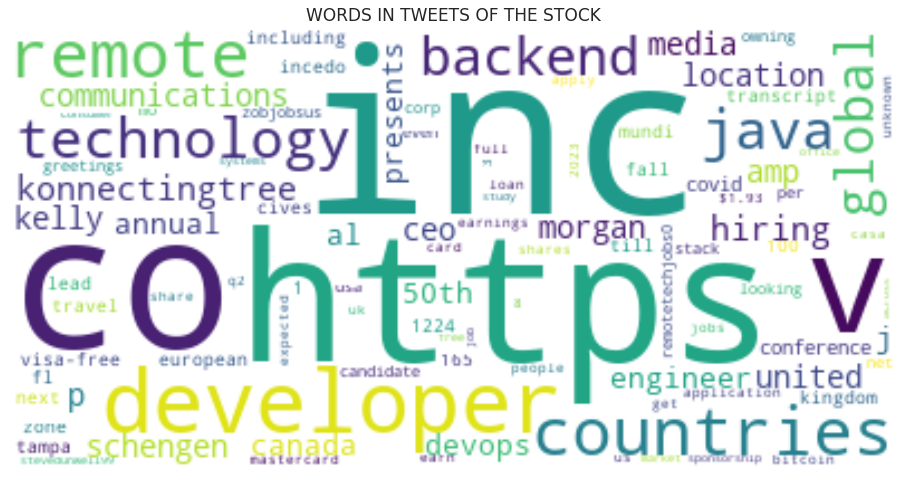

In [ ]:
#Pass to list
data = tweets['tweet'].to_list()
#identify paaterns and create tokens
pattern = r'''(?x)                  # Flag to initiate verbose mode
              (?:[A-Z]\.)+          # get abreviations like U.S.A.
              | \w+(?:-\w+)*        # words with internal -
              | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
              | \.\.\.              # gets ...
              | [][.,;"'?():-_`]    # gets punctuation marks
'''
text = []
for x in range(0, len(data)):
  token_1 = data[x].lower()
  token_2 = nltk.regexp_tokenize(token_1, pattern)
  text.append(token_2)
flatten = [w for l in text for w in l]
punctuation = list(string.punctuation)
df_2 = [w for w in flatten if w not in stop_words_n]
df_3 = [w for w in df_2 if w not in punctuation]
freq_words = nltk.FreqDist(df_3)
omit_words = ["rt","visa","stock", "stocks", "..."]
df_4 =  [w for w in df_3 if w not in omit_words]
freq_words = nltk.FreqDist(df_4)
print(freq_words.most_common(15))
plt.rcParams['figure.figsize'] = (16,9)
wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
plt.show()

# Master functions

In [ ]:
def stock_get_info(stock):
  symbol = yf.Ticker(stock)
  #Basic info
  longName = symbol.info["longName"]
  symb = symbol.info["symbol"]
  market = symbol.info["market"]
  sector = symbol.info["sector"]
  industry= symbol.info["industry"]
  longBusinessSummary = symbol.info["longBusinessSummary"]
  currency = symbol.info["currency"]
  currentPrice = symbol.info["currentPrice"]
  print(f"Name: {longName} Symbol: {symb} Market: {market}")
  print(f"Sector: {sector} Industry: {industry}\n\nBusiness description:")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nCurrent price: {currentPrice} Currency: {currency}")

In [ ]:
def stock_plot_hists(stock):
  symbol = yf.Ticker(stock)
  hist = symbol.history(period="max")
  # Let's see a historical view of the closing price
  plt.rcParams['figure.figsize'] = (16,9)
  plt.subplot(2, 1, 1)
  hist['Close'].plot(legend=True)
  plt.title('Price History from YFinance API',fontsize=17)
  plt.ylabel('Price', fontsize=15)
  plt.xlabel('Date', fontsize=15)
  # Now let's plot the total volume of stock being traded each day
  plt.subplot(2, 1, 2)
  hist['Volume'].plot(legend=True)
  plt.title('Volume of Stock Sales History from YFinance API',fontsize=17)
  plt.ylabel('Volume', fontsize=15)
  plt.xlabel('Date', fontsize=15)

In [ ]:
def stock_news_headers_word_cloud(stock, unwanted_words):
  symbol = yf.Ticker(stock)
  # Create dataframe with news info
  col_names = ['link', 'providerPublishTime', 'title', 'type','uuid']
  news_df = pd.DataFrame(columns=col_names)
  counter = 0
  for news in symbol.news:
    link = news["link"]
    providerPublishTime = news["providerPublishTime"]
    title = news["title"]
    ntype = news["type"]
    uuid = news["uuid"]
  # Assemble all data in a list
    res = [link, providerPublishTime, title, ntype, uuid]  
    # Append the result to the CSV file
    counter += 1
    df_length = len(news_df)
    news_df.loc[df_length] = res
  # Print the number of tweets for this iteration
  print("# of news added: ", counter)
  news_df['providerPublishTime'] = news_df['providerPublishTime'].apply(datetime.fromtimestamp)
  #Pass to list
  data = news_df['title'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["stock", "stocks"]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False,
                        max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('HEADLINES OF RECENT NEWS ON THE STOCK',fontsize=17)
  plt.show()

In [ ]:
#some API FUNCTIONS and parameters
def auth():
    return os.getenv('TOKEN')
def create_headers(bearer_token):
    headers = {"Authorization": "Bearer {}".format(bearer_token)}
    return headers
def create_url(keyword, start_date, end_date, max_results = 10):  
    search_url = "https://api.twitter.com/2/tweets/search/recent" #Change to the endpoint you want to collect data from
    #change params based on the endpoint you are using
    query_params = {'query': keyword,
                    'start_time': start_date,
                    'end_time': end_date,
                    'max_results': max_results,
                    'expansions': 'author_id,in_reply_to_user_id,geo.place_id',
                    'tweet.fields': 'id,text,author_id,in_reply_to_user_id,geo,conversation_id,created_at,lang,public_metrics,referenced_tweets,reply_settings,source',
                    'user.fields': 'id,name,username,created_at,description,public_metrics,verified',
                    'place.fields': 'full_name,id,country,country_code,geo,name,place_type',
                    'next_token': {}}
    return (search_url, query_params)
def connect_to_endpoint(url, headers, params, next_token = None):
    params['next_token'] = next_token   #params object received from create_url function
    response = requests.request("GET", url, headers = headers, params = params)
    print("Endpoint Response Code: " + str(response.status_code))
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()
def append_to_csv(json_response):
    #A counter variable
    counter = 0
    #Create dataframe
    col_names = ['author id', 'created_at', 'geo', 'id','lang', 'like_count', 'quote_count', 'reply_count','retweet_count','source','tweet']
    tweets_df = pd.DataFrame(columns=col_names)
    #Loop through each tweet
    for tweet in json_response['data']:     
        # We will create a variable for each since some of the keys might not exist for some tweets
        # So we will account for that
        # 1. Author ID
        author_id = tweet['author_id']
        # 2. Time created
        created_at = dateutil.parser.parse(tweet['created_at'])
        # 3. Geolocation
        if ('geo' in tweet):   
            geo = tweet['geo']['place_id']
        else:
            geo = " "
        # 4. Tweet ID
        tweet_id = tweet['id']
        # 5. Language
        lang = tweet['lang']
        # 6. Tweet metrics
        retweet_count = tweet['public_metrics']['retweet_count']
        reply_count = tweet['public_metrics']['reply_count']
        like_count = tweet['public_metrics']['like_count']
        quote_count = tweet['public_metrics']['quote_count']
        # 7. source
        source = tweet['source']
        # 8. Tweet text
        text = tweet['text']  
        # Assemble all data in a list
        res = [author_id, created_at, geo, tweet_id, lang, like_count, quote_count, reply_count, retweet_count, source, text]
        # Append the result to the CSV file
        df_length = len(tweets_df)
        tweets_df.loc[df_length] = res
        counter += 1
    print("# of Tweets added from this response: ", counter)
    return tweets_df
def tweeter_request(stock):
  symbol = yf.Ticker(stock)
  name = symbol.info["shortName"]
  #Inputs for the request
  bearer_token = auth()
  headers = create_headers(bearer_token)
  keyword = f"{name} lang:en"
  start_time = datetime.now() - timedelta(days=6)
  start_time = start_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  end_time = datetime.now()- timedelta(days=1)
  end_time = end_time.strftime("%Y-%m-%dT%H:%M:%SZ")
  max_results = 100
  url = create_url(keyword, start_time, end_time, max_results)
  json_response = connect_to_endpoint(url[0], headers, url[1])
  tweets = append_to_csv(json_response)
  return tweets
def tweets_word_cloud(tweets_df, unwanted_words):
  #Pass to list
  data = tweets_df['tweet'].to_list()
  #identify paaterns and create tokens
  pattern = r'''(?x)                  # Flag to initiate verbose mode
                (?:[A-Z]\.)+          # get abreviations like U.S.A.
                | \w+(?:-\w+)*        # words with internal -
                | \$?\d+(?:\.\d+)?%?  # gets money and percentage $15.5 o 100%
                | \.\.\.              # gets ...
                | [][.,;"'?():-_`]    # gets punctuation marks
  '''
  text = []
  for x in range(0, len(data)):
    token_1 = data[x].lower()
    token_2 = nltk.regexp_tokenize(token_1, pattern)
    text.append(token_2)
  flatten = [w for l in text for w in l]
  punctuation = list(string.punctuation)
  punctuation.append('https')
  punctuation.append('co')
  punctuation.append('t')
  df_2 = [w for w in flatten if w not in stop_words_n]
  df_3 = [w for w in df_2 if w not in punctuation]
  freq_words = nltk.FreqDist(df_3)
  omit_words = ["rt","stock", "stocks", "..."]
  omit_words = omit_words + unwanted_words
  df_4 =  [w for w in df_3 if w not in omit_words]
  freq_words = nltk.FreqDist(df_4)
  print(freq_words.most_common(15))
  plt.rcParams['figure.figsize'] = (16,9)
  wordcloud = WordCloud(background_color='white', collocations=False, max_words=100).fit_words(freq_words)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.title('WORDS IN TWEETS OF THE STOCK',fontsize=17)
  plt.show()

In [ ]:
def capm_evaluation(stock, market_ref):
  symbol = yf.Ticker(stock)
  print(f"Evaluated company: {symbol.info['longName']}")
  # get historical market data
  hist = symbol.history(period="max")
  hist['Returns'] = hist['Close'].pct_change()
  benchmark = yf.Ticker(market_ref)
  #Basic info
  longName = benchmark.info["longName"]
  shortName = benchmark.info["shortName"]
  symb = benchmark.info["symbol"]
  market = benchmark.info["market"]
  longBusinessSummary = benchmark.info["longBusinessSummary"]
  preMarketPrice = benchmark.info["preMarketPrice"]
  currency = benchmark.info["currency"]
  #Print info
  print("\n--Market reference--")
  print(f"Market: {longName} Symbol: {symb} Market: {market}")
  wrapper = textwrap.TextWrapper(width=80)
  word_list = wrapper.wrap(text=longBusinessSummary)  
  for element in word_list:
      print(element)
  print(f"\nOpen Price: {open} Currency: {currency}")
  print("\n--CAPM--")
  # get historical market data
  benchmark_hist = benchmark.history(period="max")
  benchmark_hist['bnchmrk_Returns'] = benchmark_hist['Close'].pct_change()
  benchmark_hist.columns = benchmark_hist.columns.str.replace('Close', 'bnchmrk_Close')
  capm = pd.merge(hist, benchmark_hist, left_index=True,
                      right_index=True)
  capm = capm[["Close", "Returns", "bnchmrk_Close", "bnchmrk_Returns"]]
  capm = capm.last('14M')
  print("1 Year data")
  print("START DATE: ", capm.iloc[0].name, "END DATE: ", capm.iloc[-1].name)
  mean_return_stock = capm['Returns'].mean()
  stddev_return_stock = capm['Returns'].std()
  print(
      "\nDAILY RETURNs OF STOCK: ", mean_return_stock,
      "\nYEARLY RETURNS OF STOCK: ", ((1+mean_return_stock)**250)-1)
  mean_return_benchmark_hist = capm['bnchmrk_Returns'].mean()
  stddev_return_benchmark_hist = capm['bnchmrk_Returns'].std()
  print(
      "\nDAILY RM or MARKET RETURN: ", mean_return_benchmark_hist,
      "\nYEARKY RM or MARKET RETURN: ",((1+mean_return_benchmark_hist)**250)-1)
  yearly_stock_returns = ((1+mean_return_stock)**250)-1
  yearly_market_returns = ((1+mean_return_benchmark_hist)**250)-1
  # get coeffs of linear fit
  capm.dropna(inplace=True)
  slope, intercept, r_value, p_value, std_err = stats.linregress(capm['bnchmrk_Returns'],capm['Returns'])
  print("Slope: ", slope, "\nIntercept: ", intercept,
        "\nR value: ", r_value, "\nP Value: ", p_value,
        "\nSTD Err: ", std_err)
  RFR = 0.95 #risk free rate - 9 to 10 years german bonds
  print("Risk Free Rate (RFR): ", RFR)
  beta = slope
  shortName = symbol.info["shortName"]

  if beta < 1:
    print(f"Beta < 1: less risky than market. Beta: {beta}")
  else:
    print(f"Beta >= 1: as risky or more risky than the market. Beta: {beta}")

  expected_return = RFR + beta*(yearly_market_returns - RFR)
  print(f"Expected return = {RFR} + {beta}*({yearly_market_returns} - {RFR})")
  print("\nExpected return or CAPM return of the stock: ", round(expected_return*100, 3), "%")

  if expected_return > yearly_stock_returns:
    print(f"""\nThe CAPM returns are greater than the yearly returns of the stock, {shortName} is overvalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% > Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  else:
    print(f"""\nThe CAPM returns are less than the yearly returns of the stock, {shortName} is undervalued.
  \nCAPM Returns: {round(expected_return*100, 3)}% < Yearly returns of {shortName}: {round(yearly_stock_returns*100, 3)}%""")
  # use line_kws to set line label for legend
  plt.rcParams['figure.figsize'] = (15,10)
  ax = sns.regplot(x="bnchmrk_Returns", y="Returns", data=capm, color='b', 
  line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
  # plot legend
  ax.legend()
  plt.show()

In [ ]:
def pandas_rsi(df: pd.DataFrame, window_length: int = 14, output: str = None, price: str = 'Close'):
    """
    An implementation of Wells Wilder's RSI calculation as outlined in
    his 1978 book "New Concepts in Technical Trading Systems" which makes
    use of the α-1 Wilder Smoothing Method of calculating the average
    gains and losses across trading periods and the Pandas library.
    @author: https://github.com/alphazwest
    Args:
        df: pandas.DataFrame - a Pandas Dataframe object
        window_length: int - the period over which the RSI is calculated. Default is 14
        output: str or None - optional output path to save data as CSV
        price: str - the column name from which the RSI values are calcuated. Default is 'Close'
    Returns:
        DataFrame object with columns as such, where xxx denotes an inconsequential
        name of the provided first column:
            ['xxx', 'diff', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi']
    """
    # Calculate Price Differences using the column specified as price.
    df['diff'] = df['Close'].diff(1)

    # Calculate Avg. Gains/Losses
    df['gain'] = df['diff'].clip(lower=0).round(2)
    df['loss'] = df['diff'].clip(upper=0).abs().round(2)

    # Get initial Averages'
    df['avg_gain'] = df['gain'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]
    df['avg_loss'] = df['loss'].rolling(window=window_length, min_periods=window_length).mean()[:window_length+1]

    # Calculate Average Gains
    for i, row in enumerate(df['avg_gain'].iloc[window_length+1:]):
        df['avg_gain'].iloc[i + window_length + 1] =\
            (df['avg_gain'].iloc[i + window_length] *
             (window_length - 1) +
             df['gain'].iloc[i + window_length + 1])\
            / window_length

    # Calculate Average Losses
    for i, row in enumerate(df['avg_loss'].iloc[window_length+1:]):
        df['avg_loss'].iloc[i + window_length + 1] =\
            (df['avg_loss'].iloc[i + window_length] *
             (window_length - 1) +
             df['loss'].iloc[i + window_length + 1])\
            / window_length

    # Calculate RS Values
    df['rs'] = df['avg_gain'] / df['avg_loss']

    # Calculate RSI
    df['rsi'] = 100 - (100 / (1.0 + df['rs']))

    # Save if specified
    if output is not None:
        df.to_csv(output)

    return df

In [46]:
def rsi_calculation_and_viz(stock, years = 1):
  symbol = yf.Ticker(stock)
  # get historical market data
  start_time = datetime.now() - timedelta(days=years*365)
  start_time = start_time.strftime("%Y-%m-%d")
  end_time = datetime.now()
  end_time = end_time.strftime("%Y-%m-%d")
  hist = symbol.history(start=start_time, end=end_time)
  # Make RSI Calculations
  pandas_rsi(df=hist, window_length=14, price='Close')
  print(hist)
  # Create Figure
  fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_width=[0.25, 0.75])
  # Create Candlestick chart for price data
  fig.add_trace(go.Candlestick(
      x=hist.index,
      open=hist['Open'],
      high=hist['High'],
      low=hist['Low'],
      close=hist['Close'],
      increasing_line_color='#ff9900',
      decreasing_line_color='black',
      showlegend=False
  ), row=1, col=1)
  # Make RSI Plot
  fig.add_trace(go.Scatter(
      x=hist.index,
      y=hist['rsi'],
      line=dict(color='#ff9900', width=2),
      showlegend=False,
  ), row=2, col=1
  )
  # Add upper/lower bounds
  fig.update_yaxes(range=[-10, 110], row=2, col=1)
  fig.add_hline(y=0, col=1, row=2, line_color="#666", line_width=2)
  fig.add_hline(y=100, col=1, row=2, line_color="#666", line_width=2)

  # Add overbought/oversold
  fig.add_hline(y=30, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
  fig.add_hline(y=70, col=1, row=2, line_color='#336699', line_width=2, line_dash='dash')
  # Customize font, colors, hide range slider
  layout = go.Layout(
      plot_bgcolor='#efefef',
      # Font Families
      font_family='Monospace',
      font_color='#000000',
      font_size=20,
      xaxis=dict(
          rangeslider=dict(
              visible=False
          )
      )
  )
  # update and display
  fig.update_layout(layout)
  fig.show()

# Evaluate
Evaluate several aspects of a given stock and create a detailed report to support the daily decision to buy or not a stock

In [ ]:
stock = "V"
stock_get_info(stock)

Name: Visa Inc. Symbol: V Market: us_market
Sector: Financial Services Industry: Credit Services

Business description:
Visa Inc. operates as a payments technology company worldwide. The company
facilitates digital payments among consumers, merchants, financial institutions,
businesses, strategic partners, and government entities. It operates VisaNet, a
transaction processing network that enables authorization, clearing, and
settlement of payment transactions. In addition, the company offers card
products, platforms, and value-added services. It provides its services under
the Visa, Visa Electron, Interlink, VPAY, and PLUS brands. Visa Inc. was founded
in 1958 and is headquartered in San Francisco, California.

Current price: 208.55 Currency: USD


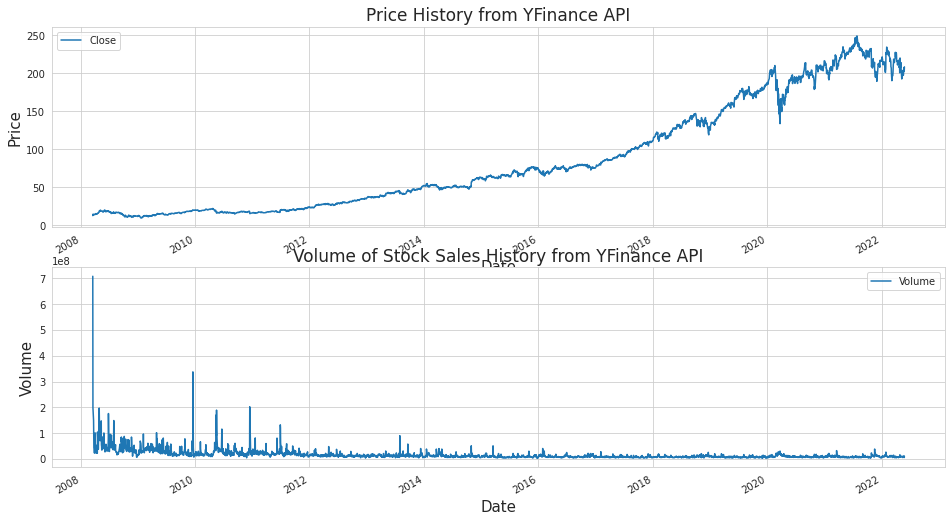

In [ ]:
stock_plot_hists(stock)

Evaluated company: Visa Inc.

--Market reference--
Market: SPDR S&P 500 ETF Trust Symbol: SPY Market: us_market
The Trust seeks to achieve its investment objective by holding a portfolio of
the common stocks that are included in the index (the “Portfolio”), with the
weight of each stock in the Portfolio substantially corresponding to the weight
of such stock in the index.

Open Price: 205.11 Currency: USD

--CAPM--
1 Year data
START DATE:  2021-04-01 00:00:00 END DATE:  2022-05-26 00:00:00

DAILY RETURNs OF STOCK:  0.00013399470052989163 
YEARLY RETURNS OF STOCK:  0.034063753156978294

DAILY RM or MARKET RETURN:  0.00014752998261152993 
YEARKY RM or MARKET RETURN:  0.037568271987959534
Slope:  1.0899154780697196 
Intercept:  -2.680051099777144e-05 
R value:  0.6665277817362864 
P Value:  7.098696784836256e-39 
STD Err:  0.07158329303355225
Risk Free Rate (RFR):  0.95
Beta >= 1: as risky or more risky than the market. Beta: 1.0899154780697196
Expected return = 0.95 + 1.0899154780697196*

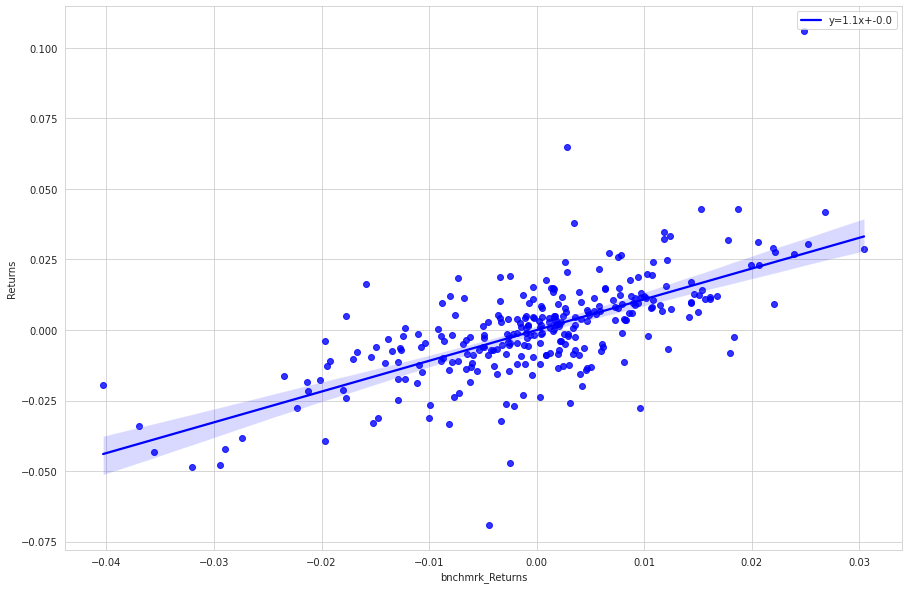

In [ ]:
market_ref = 'SPY'
capm_evaluation(stock, market_ref)

In [48]:
rsi_calculation_and_viz(stock, years = 0.5)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2021-11-26  192.638077  198.487366  191.870789  196.952789  10987600   
2021-11-29  200.290988  200.540106  194.670883  195.597595  14633500   
2021-11-30  194.581196  196.962764  191.880748  193.086487  16023000   
2021-12-01  195.338501  196.115748  189.429426  189.489212  13204900   
2021-12-02  191.322725  198.736483  191.173260  197.590530  13976300   
...                ...         ...         ...         ...       ...   
2022-05-20  199.669998  201.660004  194.020004  199.029999   6966100   
2022-05-23  200.880005  207.960007  200.770004  207.559998  12187400   
2022-05-24  203.910004  204.669998  199.029999  202.630005   7458500   
2022-05-25  200.589996  204.949997  200.470001  203.839996   5457200   
2022-05-26  205.110001  209.740005  204.669998  208.550003   9207500   

            Dividends  Stock Splits      diff  gain  loss  avg_

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# of news added:  8
[('hong', 1), ('kong', 1), ('applications', 1), ('bno', 1), ('jumped', 1), ('covid', 1), ('outbreak', 1), ('4', 1), ('8', 1), ('since', 1), ('last', 1), ('earnings', 1), ('report', 1), ('new', 1), ('program', 1)]


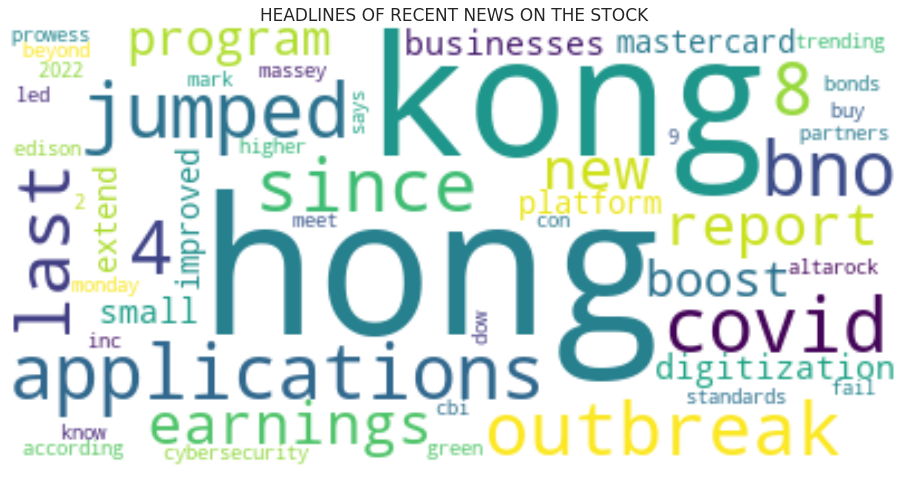

In [ ]:
unwanted_words = ['visa', 'v']
stock_news_headers_word_cloud(stock, unwanted_words)

Endpoint Response Code: 200
# of Tweets added from this response:  55
[('developer', 17), ('countries', 14), ('remote', 14), ('technology', 10), ('java', 10), ('backend', 10), ('global', 9), ('konnectingtree', 8), ('hiring', 8), ('amp', 7), ('schengen', 7), ('united', 7), ('morgan', 7), ('ceo', 7), ('kelly', 7)]


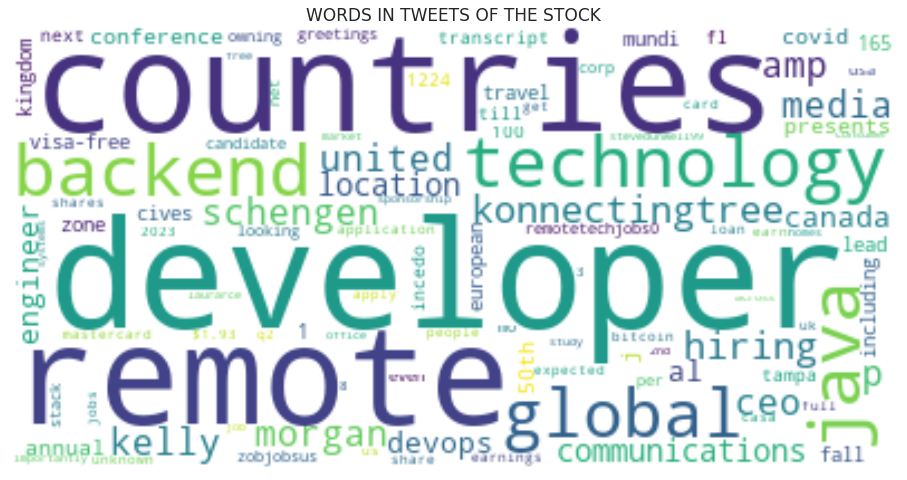

In [ ]:
tweets_df = tweeter_request(stock)
unwanted_words = ['inc', 'v', 'visa']
tweets_word_cloud(tweets_df, unwanted_words)

#Guidelines

1. Getting the data from the Bloomberg terminal – with long history
2. Calculating additional features: many technical indicators such as RSI, MACD, moving average etc.
3. Calculating the signals based on each of the indicators
Example: RSI between 30 – 70 nothing; below 30 buy, above 70 sell
https://www.investopedia.com/terms/r/rsi.asp
https://cointelegraph.com/news/here-s-3-ways-the-relative-strength-index-rsi-can-be-used-as-a-sell-signal
4. Later probably applying some feature selection methods here – Boruta, …
5. Calculate the BINARY target variable sell or buy e.g. based on the 1st differences day by day
6. Based on all of these signals train a classifier
7. Improve classification by parameter adjustments e.g. the boundaries 30 and 70

8. convert data to data series
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
10. Calculate technical indicators such as RSI
www.alpharithms.com/relative-strength-index-rsi-in-python-470209/
11. Stick with one asset




